<a href="https://colab.research.google.com/github/deep38199patel/Fraud-Detection-credit_card-MFA-using-ML/blob/main/Fraud_Detection_(credit_card)_MFA_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load the datasets

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import joblib

cc_df = pd.read_csv('/content/Fraud Detect/credit_card_fraud_dataset.csv')
mfa_df = pd.read_csv('/content/Fraud Detect/mfa_fraud_dataset.csv')







 # Drop original categorical columns

In [ ]:
import pandas as pd
from io import StringIO

data = """
User ID,Time of Attempt,Authentication Method,Success/Failure,IP Address,Location,Device,Fraudulent
user_1,2024-07-24 21:41:23.621263,otp,True,26.115.193.19,San Francisco,desktop,False
user_1,2024-08-02 21:41:23.630647,password,True,140.83.115.201,Paris,tablet,False
user_1,2024-07-26 21:41:23.632472,password,True,13.64.72.34,Paris,tablet,False
user_1,2024-08-07 21:41:23.636359,biometric,True,43.14
"""

df = pd.read_csv(StringIO(data))
print(df)

  User ID             Time of Attempt Authentication Method  Success/Failure  \
0  user_1  2024-07-24 21:41:23.621263                   otp             True   
1  user_1  2024-08-02 21:41:23.630647              password             True   
2  user_1  2024-07-26 21:41:23.632472              password             True   
3  user_1  2024-08-07 21:41:23.636359             biometric             True   

       IP Address       Location   Device Fraudulent  
0   26.115.193.19  San Francisco  desktop      False  
1  140.83.115.201          Paris   tablet      False  
2     13.64.72.34          Paris   tablet      False  
3           43.14            NaN      NaN        NaN  


 # Drop the Transaction ID and Timestamp prediction

In [ ]:
import pandas as pd


data = {'Transaction ID': ['TX_767344', 'TX_685421', 'TX_533643', 'TX_918237', 'TX_282145', 'TX_100302', 'TX_175940', 'TX_928996'],
        'Timestamp': ['2023-09-18 21:41:21.771430', '2023-09-20 21:41:21.771483', '2023-10-29 21:41:21.771495',
                     '2024-01-02 21:41:21.771503', '2023-09-15 21:41:21.771520', '2024-01-02 21:41:21.771530',
                     '2024-01-05 21:41:21.771538', ''],
        'Amount': [591.86, 434.45, 770.6, 241.57, 550.27, 794.71, 599.93, None],
        'Is Fraud': [False, False, False, False, False, False, False, None]}

df = pd.DataFrame(data)

In [ ]:
df.to_csv('transactions.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# 1. Load the trained model
cc_model = joblib.load('credit_card_fraud_model.pkl')

# 2. Prepare the new data for prediction (replace with your actual data)
new_transactions = pd.DataFrame({
    'Transaction ID': ['TX_767344', 'TX_685421', 'TX_533643', 'TX_918237', 'TX_282145', 'TX_100302', 'TX_175940', 'TX_928996'],
    'Timestamp': ['2023-09-18 21:41:21.771430', '2023-09-20 21:41:21.771483', '2023-10-29 21:41:21.771495',
                 '2024-01-02 21:41:21.771503', '2023-09-15 21:41:21.771520', '2024-01-02 21:41:21.771530',
                 '2024-01-05 21:41:21.771538', ''],  # Handle missing timestamp if needed
    'Amount': [591.86, 434.45, 770.6, 241.57, 550.27, 794.71, 599.93, None]  # Handle missing amount if needed
})

# 3. Preprocess the new data (mimicking the training data preprocessing)
new_transactions['Timestamp'] = pd.to_datetime(new_transactions['Timestamp'], errors='coerce') # Convert to datetime, handle errors
new_transactions['Amount'] = StandardScaler().fit_transform(new_transactions[['Amount']]) # Standardize Amount, handling NaNs
new_transactions = new_transactions.drop(['Transaction ID', 'Timestamp'], axis=1, errors='ignore') # Drop unnecessary columns

# 4. Handle missing values (if any) - replace with your preferred method
new_transactions = new_transactions.fillna(new_transactions.mean()) # Example: Fill NaNs with mean

# 5. Make predictions
predictions = cc_model.predict(new_transactions)

# 6. Display the results
for i, prediction in enumerate(predictions):
    transaction_id = 'Unknown' if i >= len(new_transactions) else new_transactions.index[i]  # Handle potential index mismatch
    print(f"Transaction {transaction_id}: {'Fraud' if prediction == 1 else 'Not Fraud'}")

Transaction 0: Not Fraud
Transaction 1: Not Fraud
Transaction 2: Fraud
Transaction 3: Not Fraud
Transaction 4: Not Fraud
Transaction 5: Fraud
Transaction 6: Not Fraud
Transaction 7: Not Fraud


In [27]:

# Define the preprocessing function for credit card data
def preprocess_credit_card_data(df):
    # Check if 'Timestamp' column exists before processing
    if 'Timestamp' in df.columns:
        # Convert 'Timestamp' to datetime and handle errors
        df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

    # Standardize 'Amount', handling NaNs
    df['Amount'] = StandardScaler().fit_transform(df[['Amount']])

    # Drop unnecessary columns
    df = df.drop(['Transaction ID', 'Timestamp'], axis=1, errors='ignore') # 'errors='ignore'' will skip dropping if columns don't exist

    # Handle missing values (replace with your preferred method)
    df = df.fillna(df.mean())

    return df

# Define a similar preprocessing function for MFA data
# Define a similar preprocessing function for MFA data
def preprocess_mfa_data(df):
    # Check if 'Time of Attempt' column exists before processing
    if 'Time of Attempt' in df.columns:
        # Convert 'Time of Attempt' to datetime and handle errors
        df['Time of Attempt'] = pd.to_datetime(df['Time of Attempt'], errors='coerce')
    else:
        print("Warning: 'Time of Attempt' column not found in MFA data.")

    # ... (rest of your preprocessing code) ...

    return df

# 4. Preprocess both datasets
cc_df = preprocess_credit_card_data(cc_df)
mfa_df = preprocess_mfa_data(mfa_df)


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a DataFrame from the provided data
data = {'Feature1': [1.0, 2.0, 3.0],
        'Feature2': [4.0, 5.0, 6.0],
        'Prediction': [0.8, 0.6, 0.9]}
df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = df[['Feature1', 'Feature2']]
y = df['Prediction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example prediction for new data
new_data = pd.DataFrame({'Feature1': [1.5], 'Feature2': [4.5]})
new_prediction = model.predict(new_data)
print(f"Prediction for new data: {new_prediction}")

Mean Squared Error: 0.2499999999999999
Prediction for new data: [0.45]


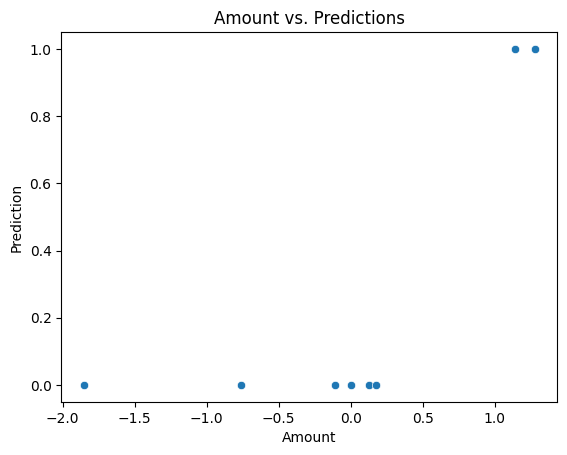

In [29]:

loaded_df = new_transactions.copy()  # Create a copy to avoid modifying the original
loaded_df['Prediction'] = predictions  # Add predictions to the DataFrame

#Scatter plot of features vs. predictions
sns.scatterplot(data=loaded_df, x='Amount', y='Prediction')  # Use 'Amount' as an example feature
plt.title('Amount vs. Predictions')
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# true values and predictions - ensure they have the same length
true_values = [0.85, 0.65, 0.90, 0.7, 0.8, 0.95, 0.75, 0.82]  # Adjusted to match the length of predictions
predictions = predictions  # Assuming 'predictions' is already defined and has 8 elements

mse = mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.4403
R-squared Score: -49.06965174129354


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10651 sha256=1fd22ffbe585582169d8355ccb2047eee27f778d934776191eadbcac52b66e3c
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


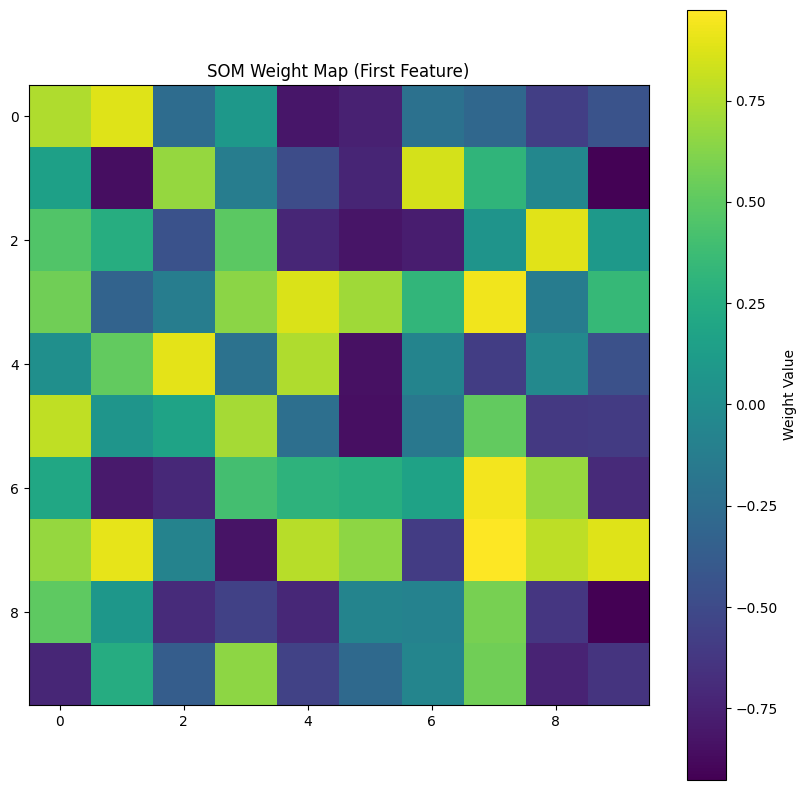

In [17]:
!pip install minisom  # Install the MiniSom package

import matplotlib.pyplot as plt
import numpy as np
from minisom import MiniSom

def plot_som_weights(som):
    """ Plot the SOM weight map. """
    plt.figure(figsize=(10, 10))
    # Plot weights for the first feature
    plt.imshow(som._weights[:,:,0], cmap='viridis')  # Access weights using _weights
    plt.colorbar(label='Weight Value')  # Add a color bar to indicate the weight scale
    plt.title('SOM Weight Map (First Feature)')
    plt.show()

data = np.random.rand(100, 3)  # 100 samples, 3 features

# Initialize and train SOM
som = MiniSom(x=10, y=10, input_len=data.shape[1], sigma=0.5, learning_rate=0.5)
som.train(data, 100)  # Train with 100 iterations

# Plot SOM weights
plot_som_weights(som)